### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [216]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [217]:
data = pd.read_csv('data/coupons.csv')

In [218]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [219]:
# Finding columns with null values
null_columns_series = data.isnull().any()
null_columns_list = null_columns_series[null_columns_series].index.tolist()
print(f"Columns with nulls: {null_columns_list}")

# Finding rows with a null in any column
rows_with_null = data.isnull().any(axis=1).sum()
print(f"Rows with nulls: {rows_with_null} out of total {len(data)} rows. {(rows_with_null/len(data))*100}%")

# Finding number of rows with null for each column with nulls
for column_name_with_null in null_columns_list:
    rows_with_null = data[column_name_with_null].isna().sum()
    print(f"Rows with null in column {column_name_with_null}: {rows_with_null}")

Columns with nulls: ['car', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
Rows with nulls: 12576 out of total 12684 rows. 99.14853358561967%
Rows with null in column car: 12576
Rows with null in column Bar: 107
Rows with null in column CoffeeHouse: 217
Rows with null in column CarryAway: 151
Rows with null in column RestaurantLessThan20: 130
Rows with null in column Restaurant20To50: 189


3. Decide what to do about your missing data -- drop, replace, other...

In [220]:
# Replacing null with 'Unknown' for car
data['car'] = data['car'].fillna('Unknown')

# Replacing null with 'Unknown' for Bar
data['Bar'] = data['Bar'].fillna('Unknown')

# Replacing null with 'Unknown' for CoffeeHouse
data['CoffeeHouse'] = data['CoffeeHouse'].fillna('Unknown')

# Replacing null with 'Unknown' for CarryAway
data['CarryAway'] = data['CarryAway'].fillna('Unknown')

# Replacing null with 'Unknown' for RestaurantLessThan20
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].fillna('Unknown')

# Replacing null with 'Unknown' for Restaurant20To50
data['Restaurant20To50'] = data['Restaurant20To50'].fillna('Unknown')


4. What proportion of the total observations chose to accept the coupon?



In [221]:
#Proportion of the total observations that choose to accept the coupon
accepted_proportion = data['Y'].mean()
print(f"Proportion that choose to accept the coupon: {round(accepted_proportion,3)}")

Proportion that choose to accept the coupon: 0.568


5. Use a bar plot to visualize the `coupon` column.

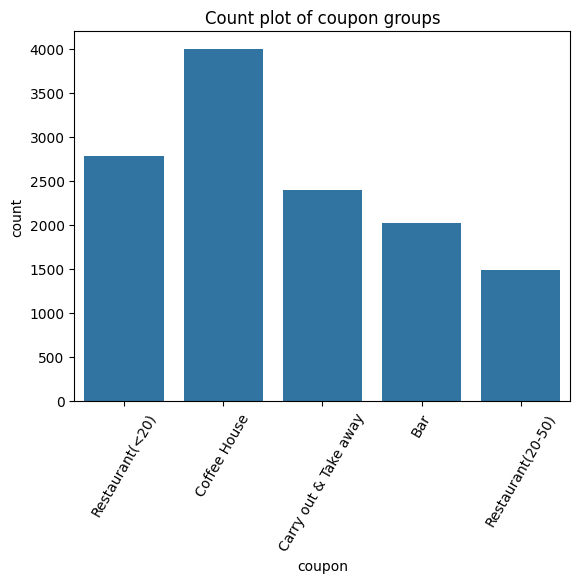

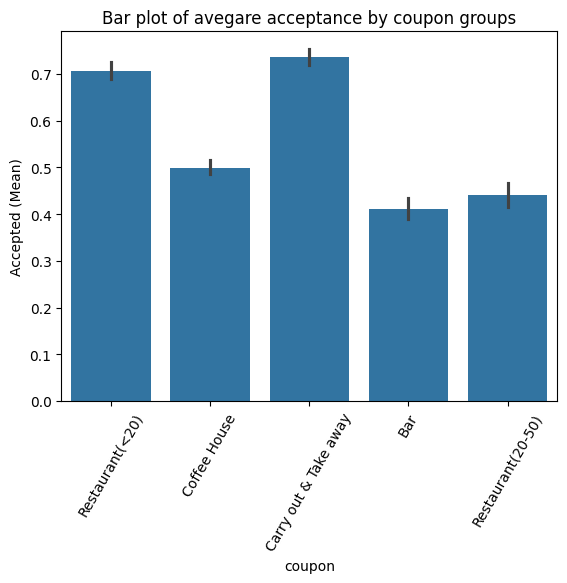

In [222]:
# Count plot of coupon type
ax = sns.countplot(data=data, x='coupon')
ax.set_title("Count plot of coupon groups")
ax.tick_params(axis='x', labelrotation=60) 
plt.show()

#Bar plot of avegare acceptance by coupon groups
ax = sns.barplot(data=data, x='coupon', y ='Y')
ax.set_title("Bar plot of avegare acceptance by coupon groups")
ax.tick_params(axis='x', labelrotation=60)
ax.set_ylabel("Accepted (Mean)")
plt.show()

6. Use a histogram to visualize the temperature column.

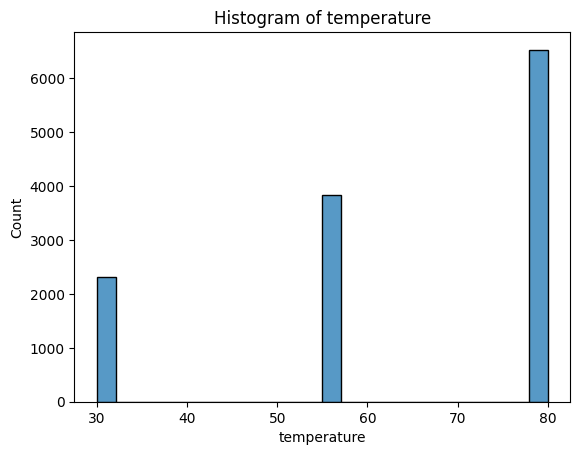

In [223]:
# Histogram to visualize the temperature column
ax = sns.histplot(data=data, x="temperature")
ax.set_title("Histogram of temperature")
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [224]:
# Creating a subset dataframe for Bar coupons
df_bar = data.query("coupon == 'Bar'")
df_bar.head(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,Unknown,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,Unknown,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,Unknown,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0
61,Work,Alone,Sunny,55,7AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,1,1,0,1,0
75,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Male,46,Married partner,...,1~3,1~3,1~3,less1,1,1,0,0,1,1


2. What proportion of bar coupons were accepted?


In [225]:
# Proportion of Bar coupons accepted
bar_accepted_proportion = df_bar['Y'].mean()
print(f"Proportion of Bar coupons accepted: {round(bar_accepted_proportion,3)}")

Proportion of Bar coupons accepted: 0.41


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


Who go to a bar <= 3 times a month: 0.371
Who go to a bar > 3 times a month: 0.769


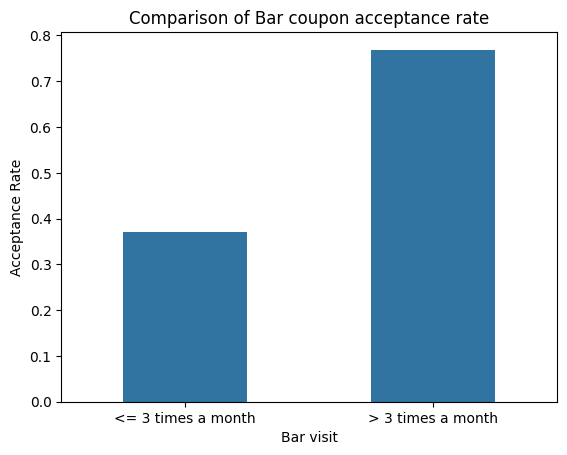

In [226]:
# Creating list of criteria values
list_bar_upto3times = ['never', 'less1', '1~3']
list_bar_morethan3 = ['4~8', 'gt8']

# Creating filtered dataframes for:
# 1. those who go to a bar < 3 times a month
# 2. those who go > 3 times a month
df_bar_upto3times = df_bar[df_bar['Bar'].isin(list_bar_upto3times)]
df_bar_morethan3 = df_bar[df_bar['Bar'].isin(list_bar_morethan3)]

# Acceptance rate among those who go to a bar <= 3 times a month
bar_accepted_upto3times = df_bar_upto3times['Y'].mean()
# Acceptance rate among those who go to a bar > 3 times a month
bar_accepted_morethan3 = df_bar_morethan3['Y'].mean()

#Print Acceptance rates
print(f"Who go to a bar <= 3 times a month: {round(bar_accepted_upto3times,3)}")
print(f"Who go to a bar > 3 times a month: {round(bar_accepted_morethan3,3)}")

# Visual comparison of the the acceptance rate between the two (bar <= 3 times and bar > 3 times)
bar_data = {'Bar visit': ['<= 3 times a month', '> 3 times a month'],
        'Acceptance Rate': [bar_accepted_upto3times, bar_accepted_morethan3]}
sns.barplot(data=pd.DataFrame(bar_data), x='Bar visit', y='Acceptance Rate', width=0.5)
plt.title('Comparison of Bar coupon acceptance rate')
plt.show()

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


Who go to a bar > once a month and age > 25 years: 0.695
The rest: 0.335
There is a huge difference. 69.5% vs 33.5%


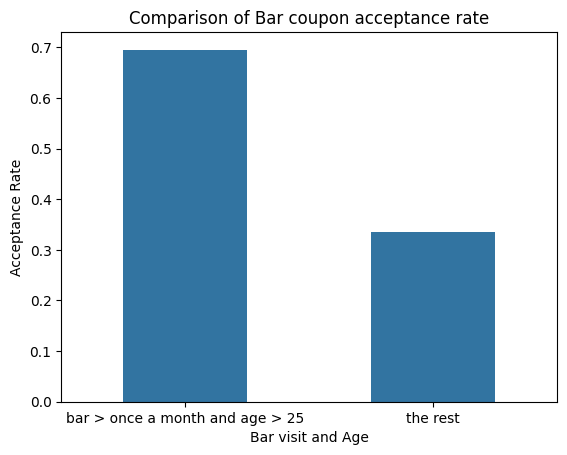

In [227]:
# Creating list of criteria values
list_bar_morethan1 = ['1~3', '4~8', 'gt8']
list_age_over25 = ['26', '31', '36', '41', '46', '50plus']

# Creating filtered dataframes for:
# 1. drivers who go to a bar > once a month and age > 25 years
# 2. the rest
df_bar_age_filter = df_bar.query('Bar in @list_bar_morethan1 & age in @list_age_over25')
df_bar_age_rest = df_bar.drop(df_bar_age_filter.index.to_series())

# Acceptance rate among those who go to a bar > once a month and age > 25 years
accepted_bar_age_filter = df_bar_age_filter['Y'].mean()
# Acceptance rate among the rest
accepted_bar_age_rest = df_bar_age_rest['Y'].mean()

#Print Acceptance rates
print(f"Who go to a bar > once a month and age > 25 years: {round(accepted_bar_age_filter,3)}")
print(f"The rest: {round(accepted_bar_age_rest,3)}")
print(f"There is a huge difference. {round(accepted_bar_age_filter,3)*100}% vs {round(accepted_bar_age_rest,3)*100}%")

# Visual comparison of the the acceptance rate between the two (bar > once a month and age > 25 and the rest)
bar_data = {'Bar visit and Age': ['bar > once a month and age > 25', 'the rest'],
        'Acceptance Rate': [accepted_bar_age_filter, accepted_bar_age_rest]}
sns.barplot(data=pd.DataFrame(bar_data), x='Bar visit and Age', y='Acceptance Rate', width=0.5)
plt.title('Comparison of Bar coupon acceptance rate')
plt.show()

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


Who went to a bar > 1s: 0.688
Who went to a bar > 1s & pass != Kids: 0.713
Who went to a bar > 1s & pass != Kids & occu != Farm Fish & Forest: 0.713
The rest: 0.296


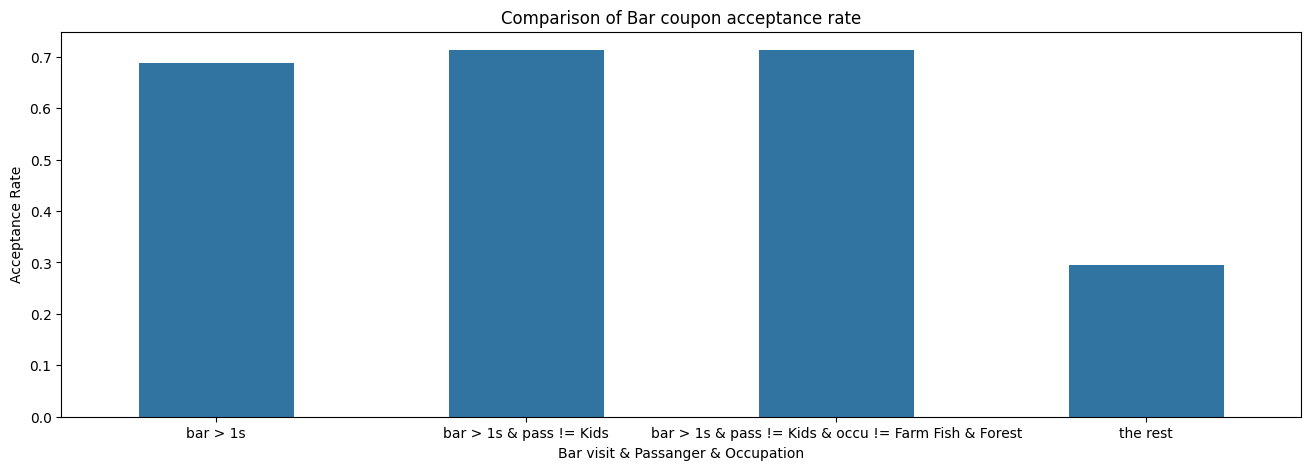

In [228]:
# Creating list of criteria values
list_bar_morethan1 = ['1~3', '4~8', 'gt8']
list_pass_kids = ['Kid(s)']
list_occu_farm_fish_forest = ['Farming Fishing & Forestry']

# Creating filtered dataframes for drivers who go to a bar > once a month and passengers not kid(s) and occupation not Farming Fishing & Forestry
df_bar_filter = df_bar[df_bar['Bar'].isin(list_bar_morethan1)]
df_bar_pass_filter = df_bar_filter[~df_bar_filter['passanger'].isin(list_pass_kids)]
df_bar_pass_occu_filter = df_bar_pass_filter[~df_bar_pass_filter['occupation'].isin(list_occu_farm_fish_forest)]
df_bar_pass_occu_rest = df_bar.drop(df_bar_pass_occu_filter.index.to_series())

# Acceptance rate among drivers who go to a bar > once a month
accepted_bar_filter = df_bar_filter['Y'].mean()
# Acceptance rate among drivers who go to a bar > once a month and passengers not kid(s)
accepted_bar_pass_filter = df_bar_pass_filter['Y'].mean()
# Acceptance rate among drivers who go to a bar > once a month and passengers not kid(s) and occupation not Farming Fishing & Forestry 
accepted_bar_pass_occu_filter = df_bar_pass_occu_filter['Y'].mean()
# Acceptance rate among the rest
accepted_bar_pass_occu_rest = df_bar_pass_occu_rest['Y'].mean()

# Print Acceptance rates
print(f"Who went to a bar > 1s: {round(accepted_bar_filter,3)}")
print(f"Who went to a bar > 1s & pass != Kids: {round(accepted_bar_pass_filter,3)}")
print(f"Who went to a bar > 1s & pass != Kids & occu != Farm Fish & Forest: {round(accepted_bar_pass_occu_filter,3)}")
print(f"The rest: {round(accepted_bar_pass_occu_rest,3)}")

# Visual comparison of the the acceptance rate between: 
# bar > 1s a month ; bar > 1s a month & passanger != Kids(s) & occupation != 'Farming Fishing & Forestry' ; the rest
bar_data = {'Bar visit & Passanger & Occupation': ['bar > 1s', 'bar > 1s & pass != Kids', 'bar > 1s & pass != Kids & occu != Farm Fish & Forest', 'the rest'],
        'Acceptance Rate': [accepted_bar_filter, accepted_bar_pass_filter, accepted_bar_pass_occu_filter, accepted_bar_pass_occu_rest]}
ax = sns.barplot(data=pd.DataFrame(bar_data), x='Bar visit & Passanger & Occupation', y='Acceptance Rate', width=0.5)
ax.figure.set_size_inches(16, 5)
plt.title('Comparison of Bar coupon acceptance rate')
plt.show()

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



Criteria A (go to bars more than once a month and are under the age of 30): 0.713
Criteria B (go to bars more than once a month and are under the age of 30): 0.722
Criteria C (go to cheap restaurants more than 4 times a month and income is less than 50K): 0.453


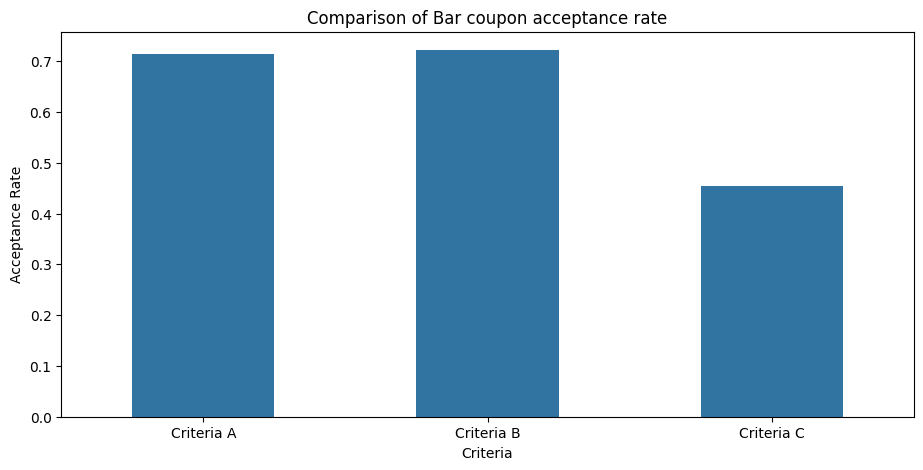

In [229]:
# (A) criteria = go to bars more than once a month, had passengers that were not a kid, and were not widowed
list_bar_morethan1 = ['1~3', '4~8', 'gt8']
list_pass_kids = ['Kid(s)']
list_marital_widowed = ['Widowed']
# Creating filtered dataframe for the criteria
df_bar_pass_marital_filter = df_bar.query('Bar in @list_bar_morethan1 & passanger not in @list_pass_kids & maritalStatus not in @list_marital_widowed')
# Acceptance rate among drivers for the criteria
accepted_bar_pass_marital_filter = df_bar_pass_marital_filter['Y'].mean()

# (B) criteria = go to bars more than once a month and are under the age of 30
list_age_less30 = ['below21', '21', '26']
# Creating filtered dataframe for the criteria
df_bar_age_filter = df_bar.query('Bar in @list_bar_morethan1 & age in @list_age_less30')
# Acceptance rate among drivers for the criteria
accepted_bar_age_filter = df_bar_age_filter['Y'].mean()

# (C) criteria = go to cheap restaurants more than 4 times a month and income is less than 50K
list_rest20_morethan4 = ['4~8', 'gt8']
list_income_less50K = ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']
# Creating filtered dataframe for the criteria
df_rest20_income_filter = df_bar.query('RestaurantLessThan20 in @list_rest20_morethan4 & income in @list_income_less50K')
# Acceptance rate among drivers for the criteria
accepted_rest20_income_filter = df_rest20_income_filter['Y'].mean()

# Print Acceptance rates
print(f"Criteria A (go to bars more than once a month and are under the age of 30): {round(accepted_bar_pass_marital_filter,3)}")
print(f"Criteria B (go to bars more than once a month and are under the age of 30): {round(accepted_bar_age_filter,3)}")
print(f"Criteria C (go to cheap restaurants more than 4 times a month and income is less than 50K): {round(accepted_rest20_income_filter,3)}")

# Visual comparison of the the acceptance rate between the three criteria A, B, C
bar_data = {'Criteria': ['Criteria A', 'Criteria B', 'Criteria C'],
        'Acceptance Rate': [accepted_bar_pass_marital_filter, accepted_bar_age_filter, accepted_rest20_income_filter]}

ax = sns.barplot(data=pd.DataFrame(bar_data), x='Criteria', y='Acceptance Rate', width=0.5)
ax.figure.set_size_inches(11, 5)
plt.title('Comparison of Bar coupon acceptance rate')
plt.show()

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

**Based on the observations, drivers with high acceptance rate of the bar coupons are the onces:**
- who go to a bar more than 3 times a month (0.769)
- who go to a bar more than once a month (0.688)
- who go to a bar more than once a month and are over the age of 25 (0.695)
- who go to a bar more than once a month and had passengers that were not a kid (0.713)
- who go to a bar more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry (0.713)
- who go to a bar more than once a month and had passengers that were not a kid, and were not widowed (0.713)
- who go to a bar more than once a month and are under the age of 30 (0.722)

**NOTE: Upon closer look, all the drivers who go to a bar more than once a month and had passengers that were not a kid, they all have occupations other than farming, fishing, or forestry and are not widowed.**

**Therefore based on my hypothesis the folloing drivers are more likely to accept Bar coupons:**
1. who go to a bar more than 3 times a month.
2. who go to a bar more than once a month.
3. who go to a bar more than once a month and are between the age of 25 and 30.
4. who go to a bar more than once a month and had passengers that were not a kid.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

**Investigating the acceptance of coupons for more expensive restaurants with average expense \\$20 to \\$50 per person**

<h5>1. Creating a new DataFrame that contains just the 'Restaurant(20-50)' coupons.</h5>

In [230]:
# Creating a subset dataframe for expensive restaurant coupons
df_restaurant50 = data.query("coupon == 'Restaurant(20-50)'")
df_restaurant50.head(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
14,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Female,21,Unmarried partner,...,never,Unknown,4~8,1~3,1,1,0,0,1,1
18,Work,Alone,Sunny,80,7AM,Restaurant(20-50),1d,Female,21,Unmarried partner,...,never,Unknown,4~8,1~3,1,1,0,0,1,1
36,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
40,Work,Alone,Sunny,80,7AM,Restaurant(20-50),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
58,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Male,46,Single,...,4~8,1~3,1~3,never,1,1,0,0,1,0
62,Work,Alone,Sunny,80,7AM,Restaurant(20-50),1d,Male,46,Single,...,4~8,1~3,1~3,never,1,1,0,0,1,0
80,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Male,46,Married partner,...,1~3,1~3,1~3,less1,1,1,0,0,1,0
84,Work,Alone,Sunny,80,7AM,Restaurant(20-50),1d,Male,46,Married partner,...,1~3,1~3,1~3,less1,1,1,0,0,1,1
102,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Male,21,Single,...,less1,1~3,less1,1~3,1,1,0,0,1,1
106,Work,Alone,Sunny,80,7AM,Restaurant(20-50),1d,Male,21,Single,...,less1,1~3,less1,1~3,1,1,0,0,1,1


<h5>2. Finding total expensive restaurant coupons sent and the proportion accepted</h5>

In [231]:
# Proportion of expensive restaurant coupons accepted
rest50_accepted_proportion = df_restaurant50['Y'].mean()
print(f"Total expensive restaurant coupons sent: {len(df_rest50)}")
print(f"Proportion accepted: {round(rest50_accepted_proportion,3)}")

Total expensive restaurant coupons sent: 1492
Proportion accepted: 0.441


<h5>3a. Have people who say they never visit expensive restaurants accepted coupons of expensive restaurants?</h5>
<h5>3b. Have people with unknown visit data for expensive restaurants accepted coupons of expensive restaurants?</h5>

In [232]:
accepted_rest50_never = len(df_restaurant50.query("Restaurant20To50 =='never' & Y == 1"))
accepted_rest50_unknown = len(df_restaurant50.query("Restaurant20To50 == 'Unknown'& Y == 1"))
print(f"People who accepted coupon but say they never go to expensive restaurant: {accepted_rest50_never}")
print(f"People who accepted coupon but Unknown expensive restaurant status: {accepted_rest50_unknown}")

People who accepted coupon but say they never go to expensive restaurant: 68
People who accepted coupon but Unknown expensive restaurant status: 7


<h5>4. Coupon acceptance rate for expensive restaurants based on visit frequency</h5>

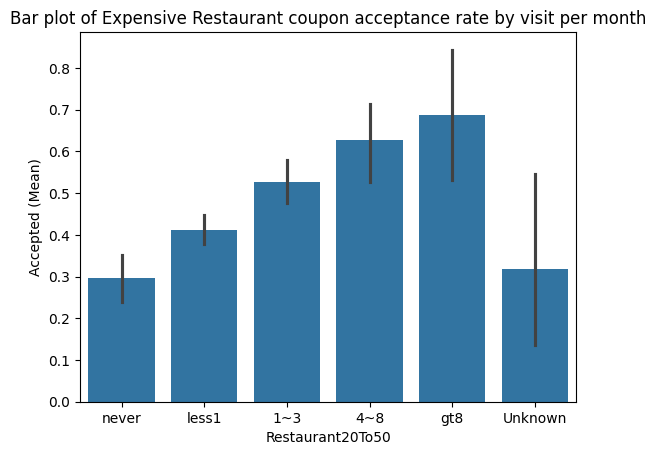

In [233]:
# Unique values of Restaurant20To50: ['never' 'less1' '1~3' '4~8' 'gt8' 'Unknown']
# Bar plot of Expensive Restaurant coupon acceptance rate by visit per month
desired_order = ['never', 'less1', '1~3', '4~8', 'gt8', 'Unknown']
ax = sns.barplot(data=df_restaurant50, x='Restaurant20To50', y ='Y', order=desired_order)
ax.set_title("Bar plot of Expensive Restaurant coupon acceptance rate by visit per month")
ax.set_ylabel("Accepted (Mean)")
plt.show()

<h5>5. Coupon acceptance rate for expensive restaurants based on marital status</h5>

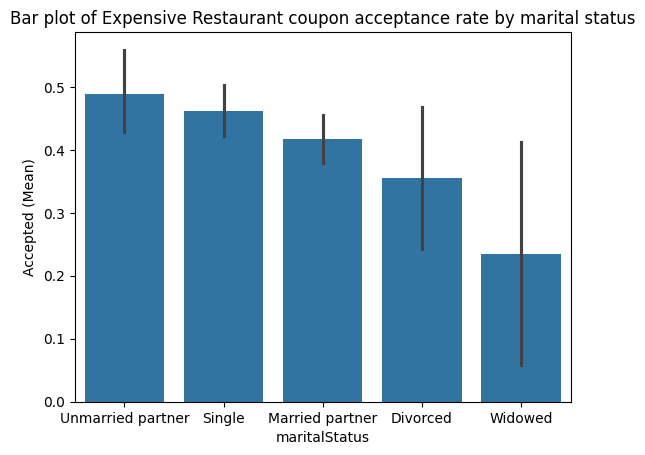

In [234]:
# Bar plot of Expensive Restaurant coupon acceptance rate by marital status
ax = sns.barplot(data=df_restaurant50, x='maritalStatus', y ='Y')
ax.set_title("Bar plot of Expensive Restaurant coupon acceptance rate by marital status")
ax.set_ylabel("Accepted (Mean)")
plt.show()

<h5>6. Coupon acceptance rate for expensive restaurants based on time</h5>

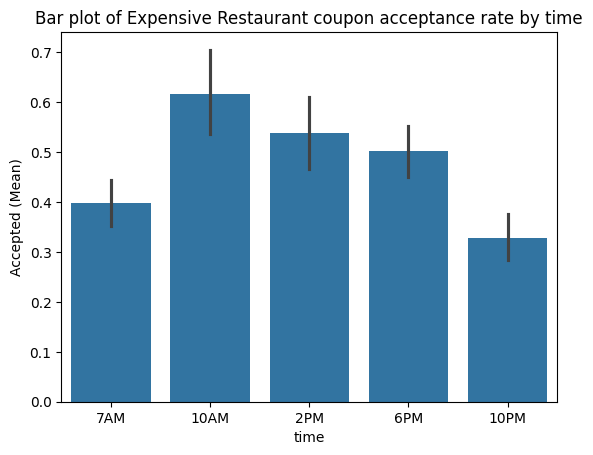

In [235]:
# Bar plot of Expensive Restaurant coupon acceptance rate by time
desired_order = ['7AM', '10AM', '2PM', '6PM', '10PM']
ax = sns.barplot(data=df_restaurant50, x='time', y ='Y', order=desired_order)
ax.set_title("Bar plot of Expensive Restaurant coupon acceptance rate by time")
ax.set_ylabel("Accepted (Mean)")
plt.show()

<h5>7. Coupon acceptance rate for expensive restaurants based on passanger</h5>

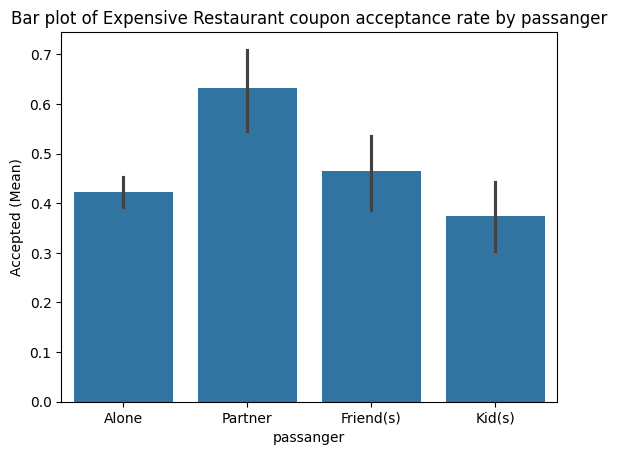

In [236]:
# Bar plot of Expensive Restaurant coupon acceptance rate by passanger
ax = sns.barplot(data=df_restaurant50, x='passanger', y ='Y')
ax.set_title("Bar plot of Expensive Restaurant coupon acceptance rate by passanger")
ax.set_ylabel("Accepted (Mean)")
plt.show()

<h5>8. Coupon acceptance rate for expensive restaurants based on weather</h5>

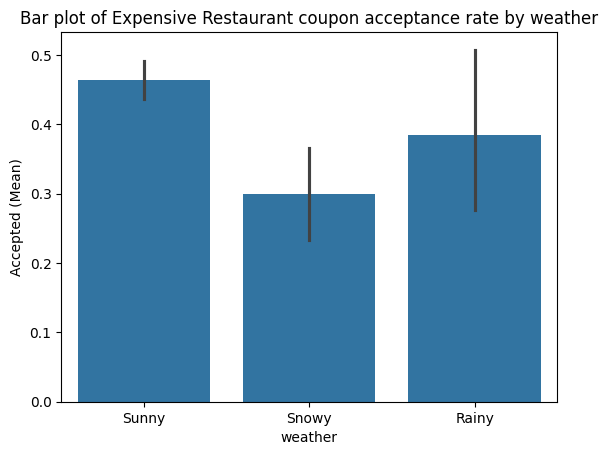

In [237]:
# Bar plot of Expensive Restaurant coupon acceptance rate by weather
ax = sns.barplot(data=df_restaurant50, x='weather', y ='Y')
ax.set_title("Bar plot of Expensive Restaurant coupon acceptance rate by weather")
ax.set_ylabel("Accepted (Mean)")
plt.show()

**Based on the data explored so far**
<h5>9. Comparing acceptance rate between :<br>
    (A) who go to a expensive restaurant 1-3 times a month, are unmarried partners, driving with a partner in sunny weather at 10 AM <br>
    (B) all others </h5>

Criteria A (Who go to expensive restaurants 1-3 times a month, are unmarried partner, driving with a partner in sunny weather at 10 AM): 0.8
All the others: 0.437


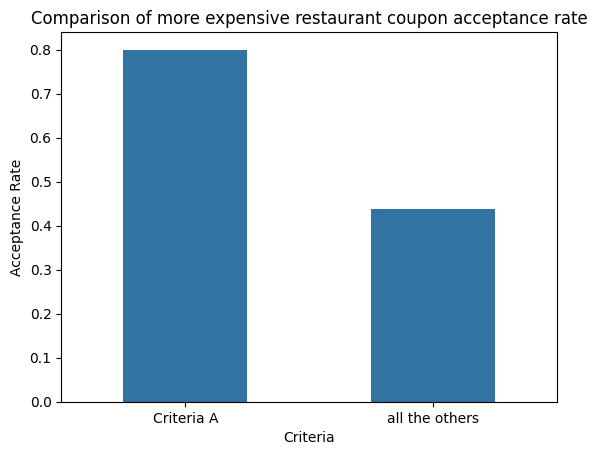

In [238]:
# Criteria A = drivers who go to expensive restaurants 1-3 times a month, are unmarried partner, driving with a partner in sunny weather at 10 AM
list_visit = ['1~3']
list_maritalStatus = ['Unmarried partner']
list_time = ['10AM']
list_passanger = ['Partner']
list_weather = ['Sunny']
# Creating filtered dataframe for the criteria
df_restaurant50_filter = df_restaurant50.query('Restaurant20To50 in @list_visit & maritalStatus in @list_maritalStatus & time in @list_time & passanger in @list_passanger & weather in @list_weather')
# Acceptance rate among drivers for the criteria
accept_restaurant50_filter = df_restaurant50_filter['Y'].mean()

# Criteria B = All the others
# Creating filtered dataframe for the criteria
df_remaining_filter = df_restaurant50.drop(df_restaurant50_filter.index.to_series())
# Acceptance rate among drivers for the criteria
accept_remaining_filter = df_remaining_filter['Y'].mean()

#Print Acceptance rates
print(f"Criteria A (Who go to expensive restaurants 1-3 times a month, are unmarried partner, driving with a partner in sunny weather at 10 AM): {round(accept_restaurant50_filter,3)}")
print(f"All the others: {round(accept_remaining_filter,3)}")

# Visual comparison of the the acceptance rate between the two criteria A and all the others
bar_data = {'Criteria': ['Criteria A', 'all the others'],
        'Acceptance Rate': [accept_restaurant50_filter, accept_remaining_filter]}

ax = sns.barplot(data=pd.DataFrame(bar_data), x='Criteria', y='Acceptance Rate', width=0.5)
#ax.figure.set_size_inches(11, 5)
plt.title('Comparison of more expensive restaurant coupon acceptance rate')
plt.show()

## Hypothesis based on observations ##
**Characteristics and contextual attributes of people who are twice as likely to accept a coupon from more expensive restaurants (\\$20 - \\$50) are:** <br>
<h5>People who go to a expensive restaurant 1-3 times a month, are unmarried partners, while driving with a partner in a sunny weather around 10 AM </h5>